In [5]:
import os
import cv2

images_dir = "images"
labels_dir = "labels"

output_image_dir = "cropped_images"
output_label_dir = "cropped_labels"

os.makedirs(output_image_dir, exist_ok=True)
os.makedirs(output_label_dir, exist_ok=True)

In [6]:
files = sorted(os.listdir(labels_dir))

for idx, file in enumerate(files, start=1):
    label_file = f"label_{idx}.txt"
    
    print(label_file)
    
    image_name = label_file.replace("label_", "image_").replace(".txt", ".jpg")
    image_path = os.path.join(images_dir, image_name)
    label_path = os.path.join(labels_dir, label_file)

    if not os.path.exists(image_path):
        print(f"{image_path} 파일이 없습니다. 스킵")
        continue

    img = cv2.imread(image_path)
    if img is None:
        print(f"{image_name} 이미지 읽기 실패. 스킵")
        continue

    h, w = img.shape[:2]

    with open(label_path, "r") as f:
        lines = f.readlines()

    for crop_idx, line in enumerate(lines):
        nums = line.strip().split()
        if len(nums) != 5:
            continue

        cls = nums[0]
        x_center, y_center, width, height = map(float, nums[1:5])

        x_min = int((x_center - width / 2) * w)
        y_min = int((y_center - height / 2) * h)
        x_max = int((x_center + width / 2) * w)
        y_max = int((y_center + height / 2) * h)

        # 좌표 클램핑
        x_min = max(0, x_min)
        y_min = max(0, y_min)
        x_max = min(w - 1, x_max)
        y_max = min(h - 1, y_max)

        crop = img[y_min:y_max, x_min:x_max]

        crop_img_name = f"{os.path.splitext(image_name)[0]}_crop{crop_idx+1}.jpg"
        crop_img_path = os.path.join(output_image_dir, crop_img_name)
        cv2.imwrite(crop_img_path, crop)

        crop_h, crop_w = crop.shape[:2]
        aspect_ratio = crop_w / crop_h if crop_h != 0 else 0

        crop_label_name = f"{os.path.splitext(label_file)[0]}_crop{crop_idx+1}.txt"
        crop_label_path = os.path.join(output_label_dir, crop_label_name)

        with open(crop_label_path, "w") as lf:
            lf.write(f"{cls} {crop_h} {crop_w} {aspect_ratio:.6f}\n")

print("크롭 이미지와 라벨 저장 완료!")


label_1.txt
label_2.txt
label_3.txt
label_4.txt
label_5.txt
label_6.txt
label_7.txt
label_8.txt
label_9.txt
label_10.txt
label_11.txt
label_12.txt
label_13.txt
label_14.txt
label_15.txt
label_16.txt
label_17.txt
label_18.txt
label_19.txt
label_20.txt
label_21.txt
label_22.txt
label_23.txt
label_24.txt
label_25.txt
label_26.txt
label_27.txt
label_28.txt
label_29.txt
label_30.txt
label_31.txt
label_32.txt
label_33.txt
label_34.txt
label_35.txt
label_36.txt
label_37.txt
label_38.txt
label_39.txt
label_40.txt
label_41.txt
label_42.txt
label_43.txt
label_44.txt
label_45.txt
label_46.txt
label_47.txt
label_48.txt
label_49.txt
label_50.txt
label_51.txt
label_52.txt
label_53.txt
label_54.txt
label_55.txt
label_56.txt
label_57.txt
label_58.txt
label_59.txt
label_60.txt
label_61.txt
label_62.txt
label_63.txt
label_64.txt
label_65.txt
label_66.txt
label_67.txt
label_68.txt
label_69.txt
label_70.txt
label_71.txt
label_72.txt
label_73.txt
label_74.txt
label_75.txt
label_76.txt
label_77.txt
label_78

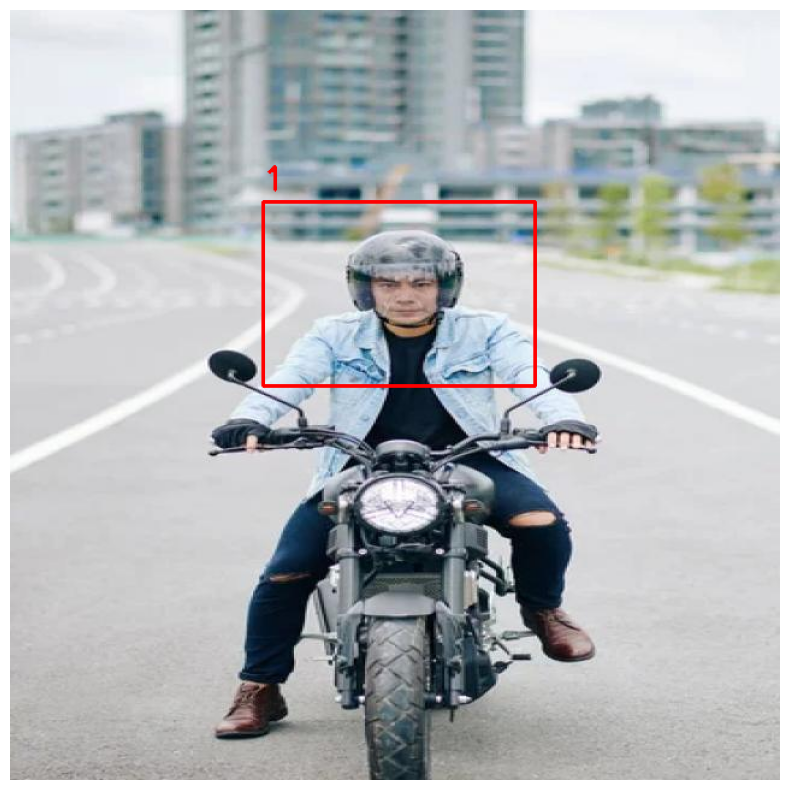

In [ ]:
# 바운딩 박스 그려서 바로 출력

import os
import cv2
import matplotlib.pyplot as plt

def draw_bounding_boxes_in_notebook(image_path, label_path):
    img = cv2.imread(image_path)
    if img is None:
        print("이미지 로드 실패")
        return
    
    # OpenCV는 BGR 형식이므로 RGB로 변환
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    h, w = img.shape[:2]

    with open(label_path, "r") as f:
        lines = f.readlines()

    for line in lines:
        parts = line.strip().split()
        if len(parts) != 5:
            continue
        cls = parts[0]
        x_center, y_center, width, height = map(float, parts[1:5])
        
        x_min = int((x_center - width / 2) * w)
        y_min = int((y_center - height / 2) * h)
        x_max = int((x_center + width / 2) * w)
        y_max = int((y_center + height / 2) * h)

        # 좌표가 이미지 밖으로 나가지 않도록 클램핑
        x_min = max(0, x_min)
        y_min = max(0, y_min)
        x_max = min(w - 1, x_max)
        y_max = min(h - 1, y_max)

        # 바운딩 박스 그리기
        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
        cv2.putText(img, cls, (x_min, max(y_min - 10, 0)),
        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # for line in lines:
    #     parts = line.strip().split()
    #     if len(parts) != 5:
    #         continue
    #     cls = parts[0]
    #     x1, y1, x2, y2 = map(float, parts[1:5])

    #     x1_px = int(x1 * w)
    #     y1_px = int(y1 * h)
    #     x2_px = int(x2 * w)
    #     y2_px = int(y2 * h)

    #     x_min, x_max = min(x1_px, x2_px), max(x1_px, x2_px)
    #     y_min, y_max = min(y1_px, y2_px), max(y1_px, y2_px)

    #     # 바운딩 박스 그리기 (빨간색, 두께 2)
    #     cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
    #     # 클래스 번호 텍스트 그리기
    #     cv2.putText(img, cls, (x_min, max(y_min - 10, 0)), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # matplotlib로 이미지 출력
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# 입력 번호
num = int(input("바운딩 박스 확인할 이미지 번호 입력: "))

images_dir = "images"
labels_dir = "labels"

image_file = f"image_{num}.jpg"
label_file = f"label_{num}.txt"

image_path = os.path.join(images_dir, image_file)
label_path = os.path.join(labels_dir, label_file)

if os.path.exists(image_path) and os.path.exists(label_path):
    draw_bounding_boxes_in_notebook(image_path, label_path)
else:
    print("해당 번호의 이미지나 라벨 파일이 없습니다.")

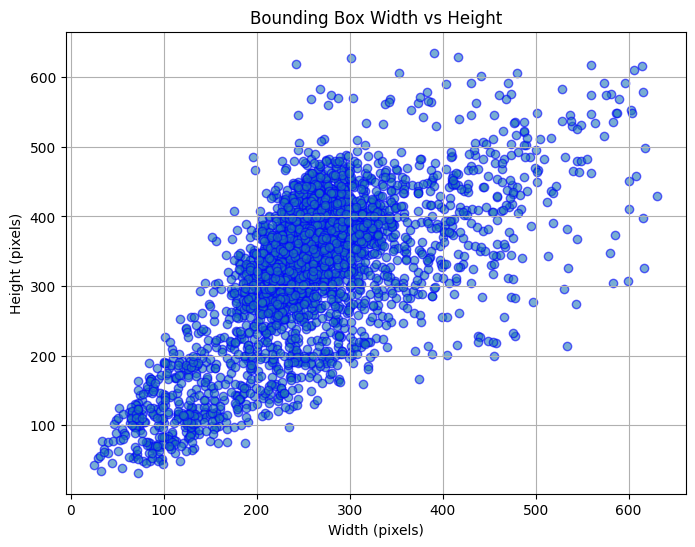

In [8]:
import os
import matplotlib.pyplot as plt

output_label_dir = "cropped_labels"  # 새로 만든 라벨 파일들이 있는 폴더

widths = []
heights = []

for label_file in os.listdir(output_label_dir):
    label_path = os.path.join(output_label_dir, label_file)
    with open(label_path, "r") as f:
        lines = f.readlines()
    for line in lines:
        parts = line.strip().split()
        if len(parts) < 4:  # 새 라벨 파일은 cls, height, width, aspect ratio 순일 가능성 있음
            continue
        # 새 라벨 파일 포맷: cls height width aspect_ratio
        height = float(parts[1])
        width = float(parts[2])
        heights.append(height)
        widths.append(width)

plt.figure(figsize=(8,6))
plt.scatter(widths, heights, alpha=0.6, edgecolors='b')
plt.title("Bounding Box Width vs Height")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.grid(True)
plt.show()